In [2]:
! pip install pandas openpyxl

Loading the Dat

In [3]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\lion\Desktop\JEOPARDY_CSV.xlsx'  # Update with your file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


Data Cleaning

In [4]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.dropna(inplace=True)  # Drop rows with any missing values


Show Number      0
Air Date         0
Round            0
Category       152
Value            0
Question         2
Answer          34
dtype: int64


Data Exploration

In [5]:
# Basic statistics
print(df.describe())

# Value counts for categorical columns
print(df['Category'].value_counts().head(10))
print(df['Round'].value_counts())


         Show Number
count  216742.000000
mean     4263.930872
std      1386.465023
min         1.000000
25%      3349.000000
50%      4490.000000
75%      5393.000000
max      6300.000000
BEFORE & AFTER             547
SCIENCE                    518
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
WORLD HISTORY              377
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
HISTORY                    349
SPORTS                     342
Name: Category, dtype: int64
Jeopardy!           107293
Double Jeopardy!    105817
Final Jeopardy!       3629
Tiebreaker               3
Name: Round, dtype: int64


Data Visualisation

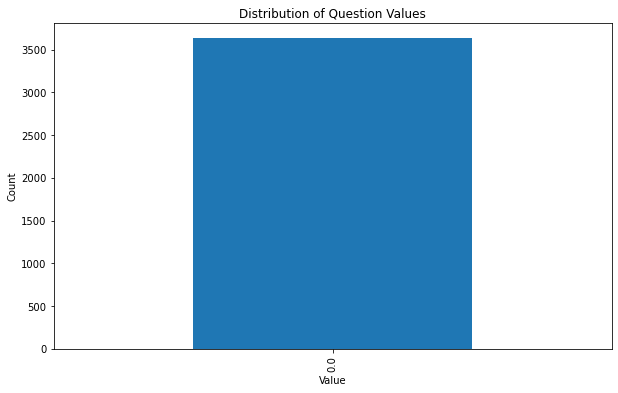

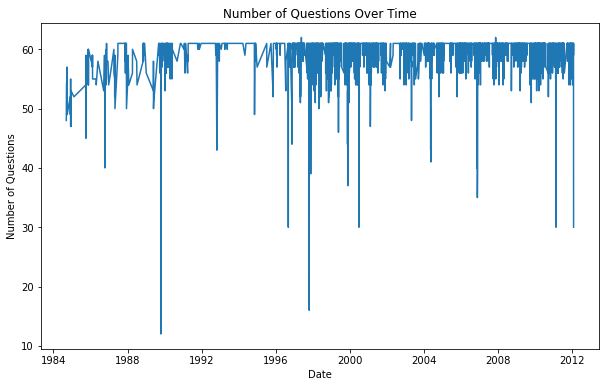

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Update with your actual file path
file_path = r'C:\Users\lion\Desktop\JEOPARDY_CSV.xlsx'
df = pd.read_excel(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Clean the 'Value' column
# Remove any leading/trailing spaces in 'Value' entries
df['Value'] = df['Value'].str.strip()

# Replace non-numeric values with a default numeric value (0 in this case)
df['Value'].replace(to_replace=r'[^0-9]', value='0', regex=True, inplace=True)

# Convert 'Value' to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Ensure 'Value' is in float format
df['Value'] = df['Value'].astype(float)

# Convert 'Air Date' to datetime
df['Air Date'] = pd.to_datetime(df['Air Date'])

# Extract only the date part from 'Air Date'
df['Air Date'] = df['Air Date'].dt.date


# Distribution of question values
plt.figure(figsize=(10, 6))
df['Value'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Question Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

# Plot the number of questions over time
plt.figure(figsize=(10, 6))
df.groupby('Air Date').size().plot()
plt.title('Number of Questions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Questions')
plt.show()


Data Transformation:
   Inspect the data
   

In [10]:

print(df.head())
print(df.info())

   Show Number    Air Date      Round                         Category  Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY    NaN   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES    NaN   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...    NaN   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE    NaN   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES    NaN   

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 

In [12]:
# Check for and remove any null values
df = df.dropna()

# Ensure consistent data types
df['Value'] = df['Value'].astype(int)

# Extract the question length
df['Question_Length'] = df['Question'].str.len()

# Split the question text into tokens
df['Question_Tokens'] = df['Question'].str.split()

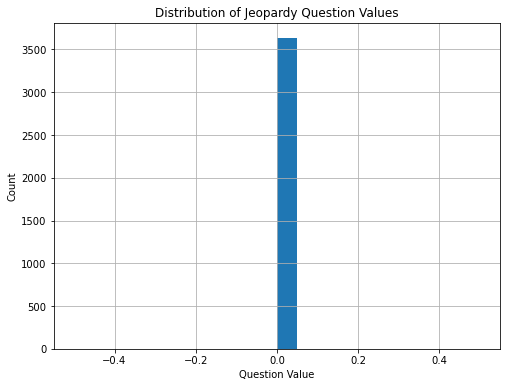

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['Value'].hist(bins=20)
plt.title('Distribution of Jeopardy Question Values')
plt.xlabel('Question Value')
plt.ylabel('Count')
plt.show()

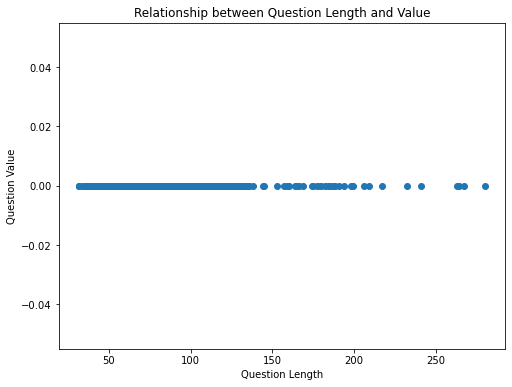

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Question_Length'], df['Value'])
plt.title('Relationship between Question Length and Value')
plt.xlabel('Question Length')
plt.ylabel('Question Value')
plt.savefig('question_length_vs_value.png')

In [18]:
# Step 3: Data Mining - Example Tasks

## Frequency analysis of Categories
category_counts = jeopardy_df['Category'].value_counts().head(10)
print("\nTop 10 Categories by Frequency:\n", category_counts)

## Correlation analysis (if applicable)
correlation_matrix = jeopardy_df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


KeyError: 'Category'